The notebook calculates the overlap between ROIs within parcels or subject-specific localized ROIs.

In [1]:
# Import funROI
import sys
import os
package_path = "../funROI"
sys.path.append(os.path.abspath(package_path))
import funROI
from funROI import utils, first_level, analysis

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the BIDS data directories
funROI.set_bids_data_folder("./data/bids")
funROI.set_bids_deriv_folder("./data/bids/derivatives")
funROI.set_bids_preprocessed_folder("./data/bids/derivatives/fmriprep")

For parcels:

<Axes: xlabel='name_2', ylabel='name_1'>

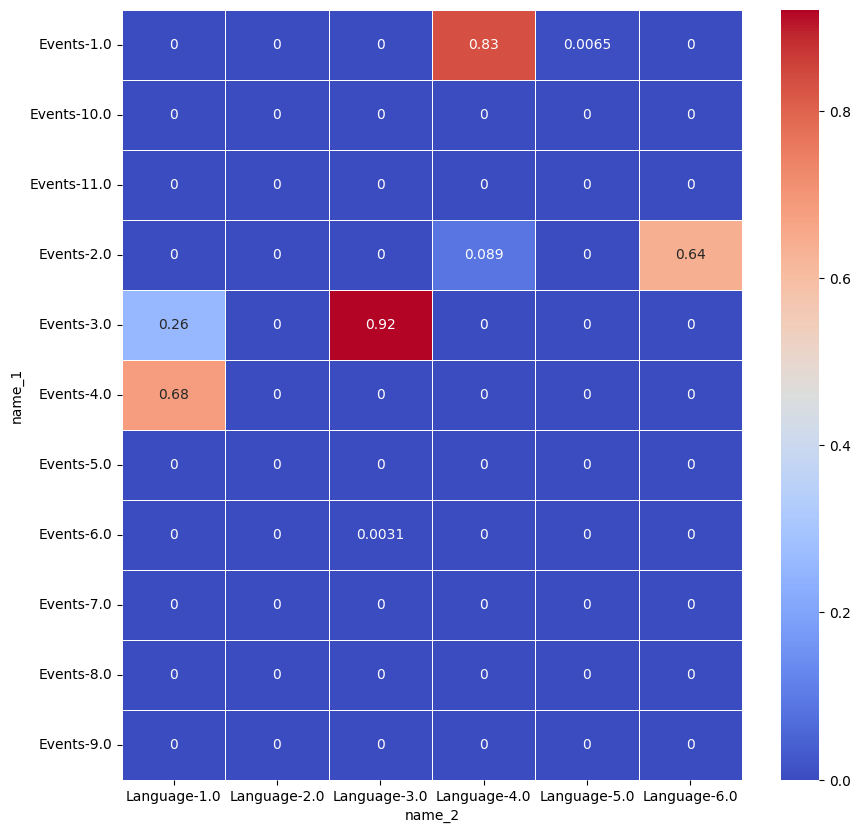

In [3]:
parcels_overlap_analyzer = analysis.OverlapAnalyzer()
parcels_overlap_analyzer.add_parcels("Events")
parcels_overlap_analyzer.add_parcels("Language")
df = parcels_overlap_analyzer.run()

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
import seaborn as sns
df['name_1'] = df[['img_1', 'ssroi_1']].astype(str).agg('-'.join, axis=1)
df['name_2'] = df[['img_2', 'ssroi_2']].astype(str).agg('-'.join, axis=1)
heatmap_data = df.groupby(['name_1', 'name_2'])['overlap_ratio'].mean().unstack()
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)

For subject-specific localized ROIs:

<Axes: xlabel='name_2', ylabel='name_1'>

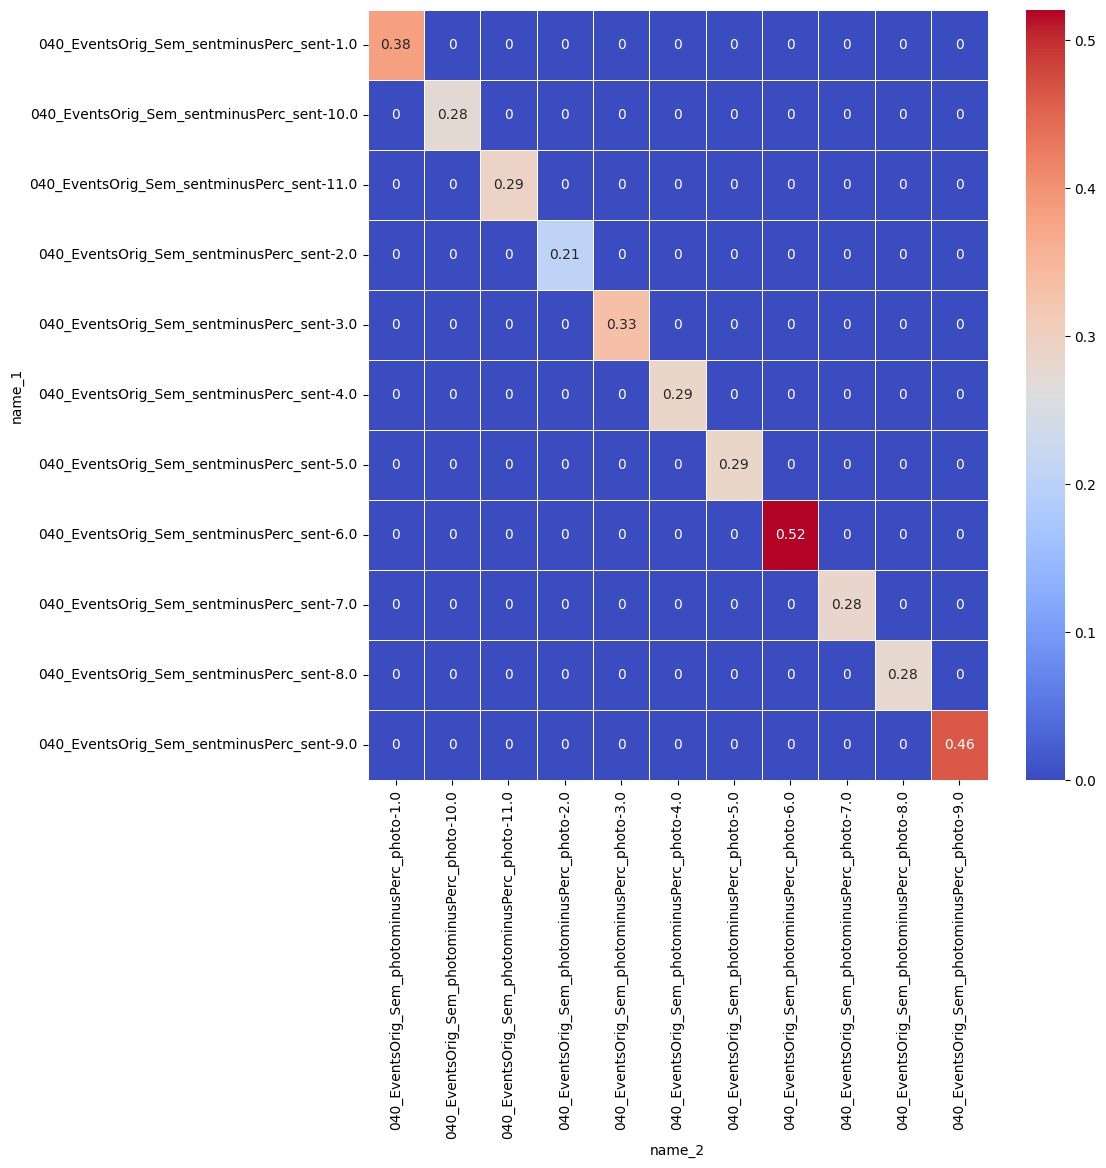

In [4]:
ssroi_overlap_analyzer = analysis.OverlapAnalyzer()
ssroi_overlap_analyzer.add_ssroi(
    subject='040', task='EventsOrig', localizer='Sem_sentminusPerc_sent', 
    threshold_type='percent', threshold_value=0.10, parcels_name='Events')
ssroi_overlap_analyzer.add_ssroi(
    subject='040', task='EventsOrig', localizer='Sem_photominusPerc_photo', 
    threshold_type='percent', threshold_value=0.10, parcels_name='Events')
df = ssroi_overlap_analyzer.run()

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
import seaborn as sns
df['name_1'] = df[['img_1', 'ssroi_1']].astype(str).agg('-'.join, axis=1)
df['name_2'] = df[['img_2', 'ssroi_2']].astype(str).agg('-'.join, axis=1)
heatmap_data = df.groupby(['name_1', 'name_2'])['overlap_ratio'].mean().unstack()
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)